In [1]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# more niched libraries that were usefull
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# naming the collumns
cols = ["fLength", "fWidht", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)

In [3]:
# transformin the column class from "g" and "h" to 1 and 0 for faster classification
df["class"] = (df["class"].str.strip()=="g").astype(int)

In [4]:
# defining this variable size to not have to type len(df["class"]) too much
size = len(df["class"])

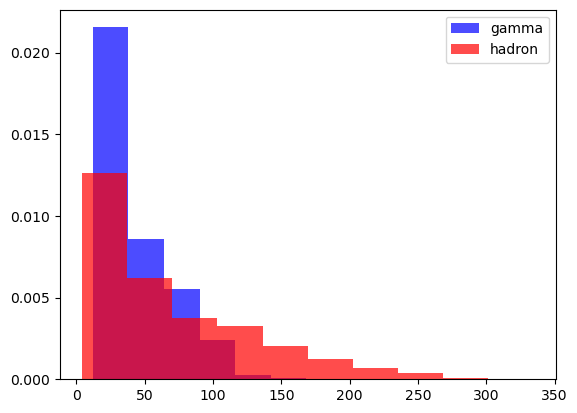

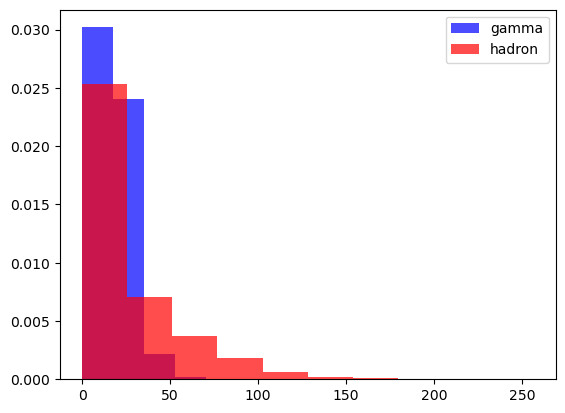

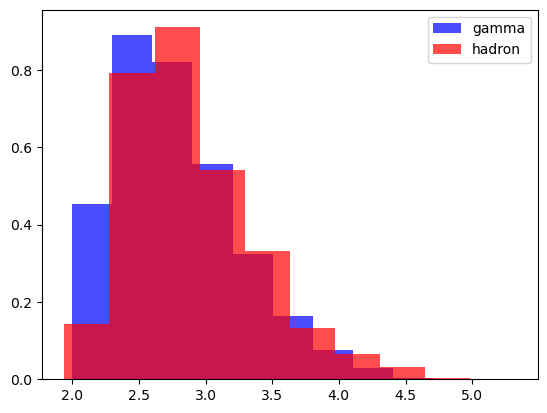

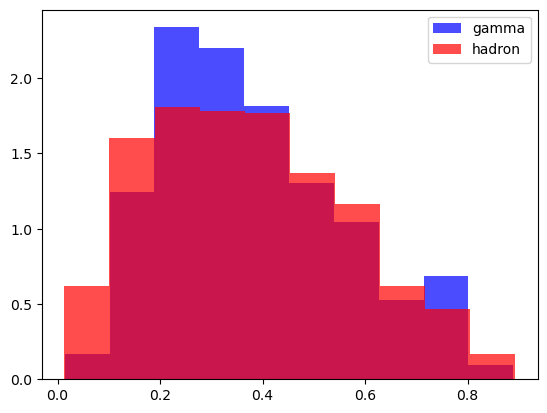

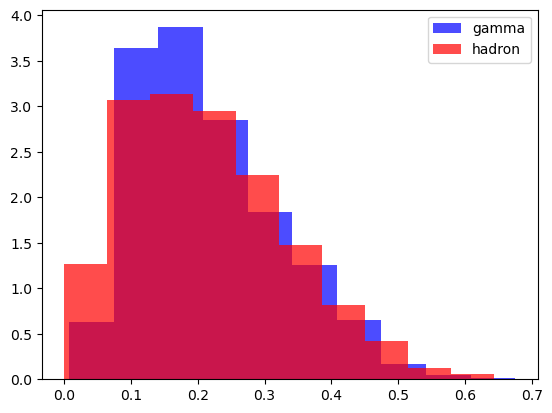

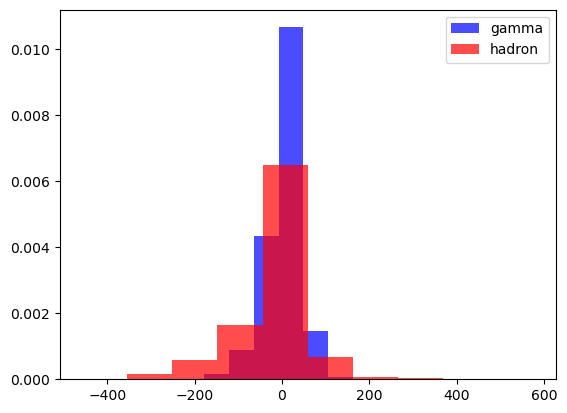

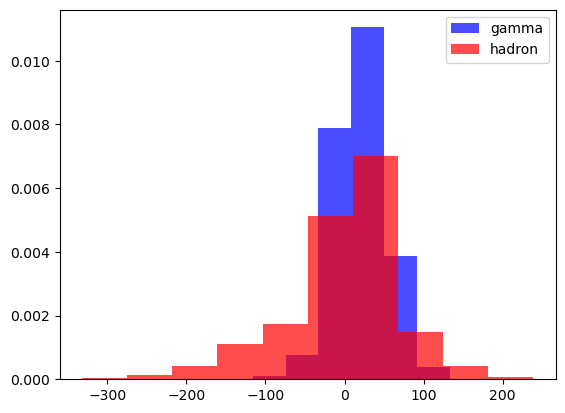

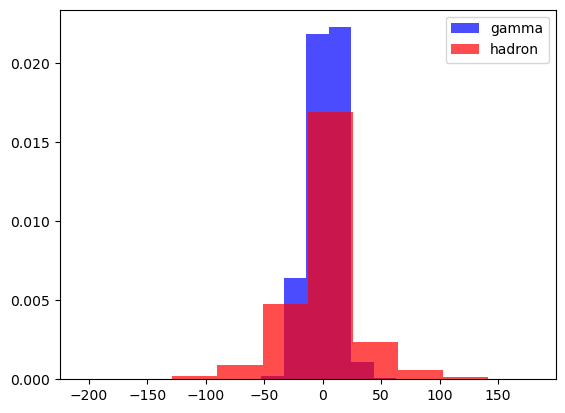

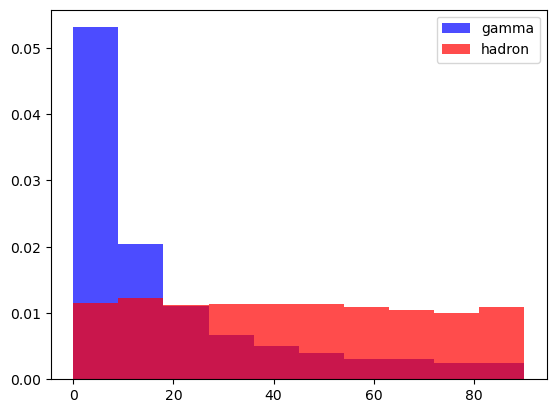

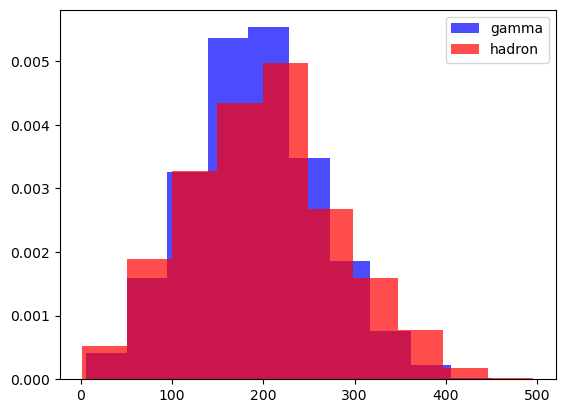

In [5]:
# plotting the graph for every column for both hadrons and gamma particles, blue for gammas, red for hadrons
for label in cols [:-1]:
    plt.hist(df[df["class"] ==1][label], color = "blue", label = "gamma", alpha = 0.7, density=True)
    plt.hist(df[df["class"] ==0][label], color = "red", label = "hadron", alpha = 0.7, density=True)
    plt.title = label
    plt.xlabel = label
    plt.ylabel = "Probability"
    plt.legend()
    plt.show()

In [6]:
# splitting our dataframe into 3, one for training, one for validation, and one for testing. 
# I splited it 70/15/15 but this is arbitrary, 60/20/20 and 80/10/10 are very common as well
train, valid, test = np.split(df.sample(frac=1), [int(0.7*size), int(0.85*size)])

In [7]:
# Function that makes use of the imblearn.over_sampling librarie to rebalance our data. 
# In this dataset there where WAY more gamma particles than hadrons, this could cause issues
# This function simply generates more samples for hadrons untill there is a balance between both classes
def scale_dataset(df, oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    y.shape
    if oversample == True:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data,x,y

In [8]:
# Usin the function in our 3 dataFrames
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [9]:
# They are balanced now
print(len(y_train), sum(y_train==1), sum(y_train==0))

17374 8687 8687


# KNN


This model is used for classifying an individual based on what is the type of individuals similar to him. The acronym stands for K nearest neighbors, with k being the number of neighbors we are looking at. In this case I'm looking only at 1 neighbor, so an individual will be classified as the same class as his nearest neighbors. Usually the value for k is higher (3 or 5), but I tested with higher values and the classification doesn't improve, despite the higher computational cost.

In [10]:
# importing the specific libraries with KNN already implemented
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors = 1) #here is where I made the choice for only 1 neighbor
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_predict = knn_model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1053
           1       0.82      0.89      0.85      1800

    accuracy                           0.81      2853
   macro avg       0.80      0.78      0.79      2853
weighted avg       0.80      0.81      0.80      2853



The main value we are looking ate here is accuracy for the f1-score, so **KNN got a score of 0.82**.

# Naive Bayes

Makes use of Bayes´s rule for classification. The term Naive means we are assuming all metrics are independent. This classification tecnique is honestly fairly complicated to me so I'm not gonna risk explaining it wrong here. For good explanations on this you can look at the video that is source for this whole project, I'm gonna leave it in the README file at the github repository. 
The incredible thing about Python is the power of its libraries, so even with minimal understanding of Naive Bayes we can apply this tecnique using scikit.

In [13]:
# import the necessary library
from sklearn.naive_bayes import GaussianNB

In [14]:
# creating the naive_bayes model using the library
nb_model = GaussianNB()

# using the model in our training data
nb_model.fit(x_train, y_train)

GaussianNB()

In [15]:
# seeing how our test performed
y_predict = nb_model.predict(x_test) 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.39      0.51      1053
           1       0.72      0.91      0.80      1800

    accuracy                           0.72      2853
   macro avg       0.72      0.65      0.65      2853
weighted avg       0.72      0.72      0.69      2853



**Naive Bayes got a score of 0.73** a worst score than KNN. 

# Log regression

Log regression is simply trying to fit our data to a sigmoid function. We do this by manipulating algebraicaly the expression for the regression line Y = MX + B to a sigmoid function. The explanation in detail is unecessary for this small project, but I would highly recommend searching for additional resources on the subject if it interests you.

In [16]:
# importing the necessary library
from sklearn.linear_model import LogisticRegression

In [17]:
# creating our log regression model using the library
lg_model = LogisticRegression()

# using the model in our training data
lg_model.fit(x_train, y_train)

LogisticRegression()

In [18]:
#seeing how our test performed
y_predict = lg_model.predict(x_test) 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1053
           1       0.84      0.84      0.84      1800

    accuracy                           0.80      2853
   macro avg       0.78      0.79      0.79      2853
weighted avg       0.80      0.80      0.80      2853



**Accuracy of 0.79**, still worst than KNN.

# SVM

The Support Vector Machine is the tecnique of finding the hyperplane that best divides our training data into the two different classes. I use hyperplane here because it is the general term but thinking in 2D the concept becomes really simple, it would be finding the line that best splits our data into two classes. The number of dimension would be the length of our feature vector. There are many other optimizations done to make SVMs so powerfull that I won't go to much in depth here. Of the tecniques used in this project to classify data this one is the most effective, so if you are gonna learn more about any of them, let SVMs be the one.

In [19]:
# importing the necessary library
from sklearn.svm import SVC

In [20]:
# creating our SVM using the library
svm_model = SVC()

# using the model in our training data
svm_model.fit(x_train, y_train)

SVC()

In [21]:
#seeing how our test performed
y_predict = svm_model.predict(x_test) 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1053
           1       0.89      0.91      0.90      1800

    accuracy                           0.87      2853
   macro avg       0.86      0.85      0.86      2853
weighted avg       0.87      0.87      0.87      2853



**A score of 0.87, the best yet.** Proving what I said about SVMs being really powerfull.

# Neural net


Neural networks are a really vast field with many differente applications. Here we are simply gonna use to classifiy data into 2 categories, a very simple application. There is HEAVY use of Tensorflow in here for creating the Neural Net and training it. 

In [22]:
# importing tensorflow, the main library that made this section possible, huge thanks for the developers of this incredible library
# https://www.tensorflow.org/?hl=pt-br
import tensorflow as tf

In [23]:
# Defining the function for plotting the result of our models, this is copied straight from tensorflow
def plot_history(history):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.grid(True)
    
    ax1.plot(history.history["accuracy"], label="accuracy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)
    
    plt.show()

In [24]:
# Defining our function for training the model
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
        nn_model = tf.keras.Sequential([
            tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(num_nodes, activation="relu"),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(1, activation="sigmoid")
        
        ])
        nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy",
                        metrics=["accuracy"])
        history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,verbose =0)
        return nn_model, history

Note that I allowed for huge control in creating the model with 7 different parameters in the train_model function. This will be handy for testing what would be the best Neural Net for our specific use case of classifying hadrons and gama particles. I highly encourage experimenting with this cell in particular.

16 nodes, dropout 0, lr0.01, batch size 64


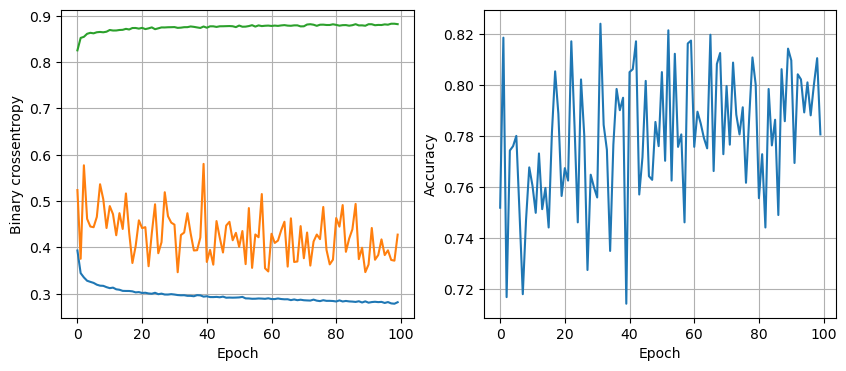

90/90 [==============================] - 0s 1ms/step - loss: 0.2938 - accuracy: 0.8766
16 nodes, dropout 0, lr0.01, batch size 128


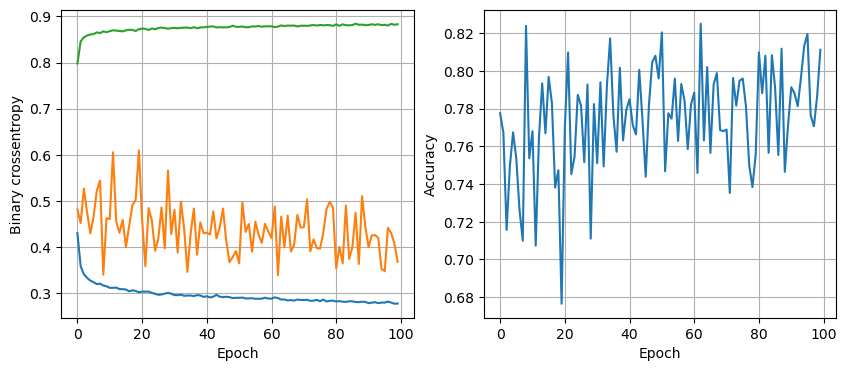

90/90 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.8693
16 nodes, dropout 0, lr0.005, batch size 64


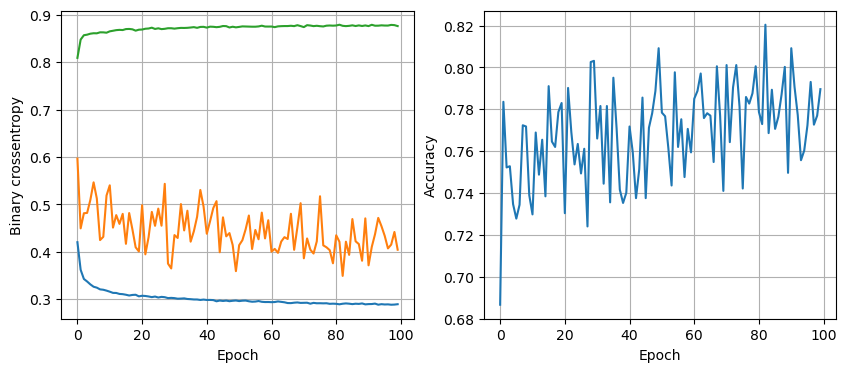

90/90 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8742
16 nodes, dropout 0, lr0.005, batch size 128


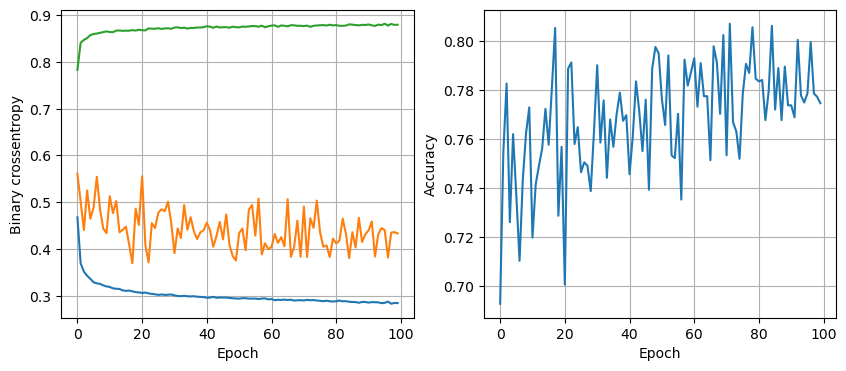

90/90 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8763
16 nodes, dropout 0.2, lr0.01, batch size 64


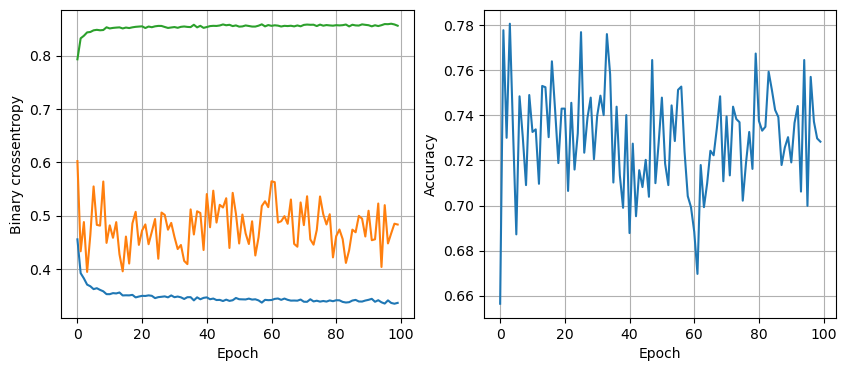

90/90 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8661
16 nodes, dropout 0.2, lr0.01, batch size 128


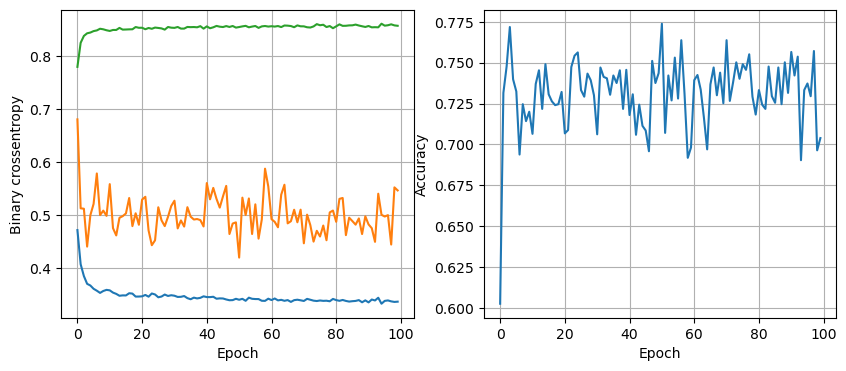

90/90 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8682
16 nodes, dropout 0.2, lr0.005, batch size 64


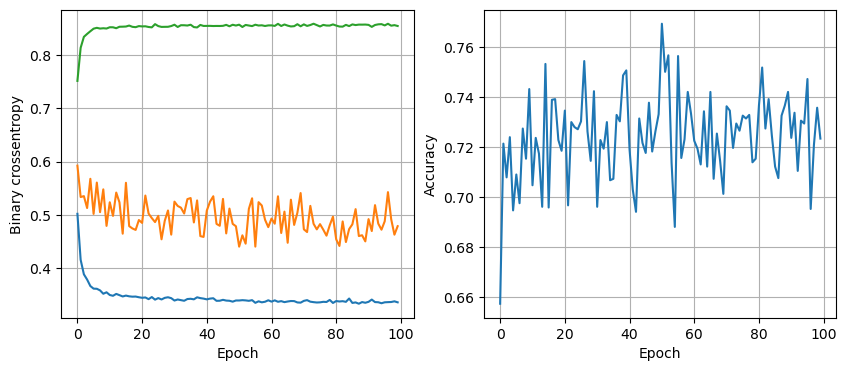

90/90 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8665
16 nodes, dropout 0.2, lr0.005, batch size 128


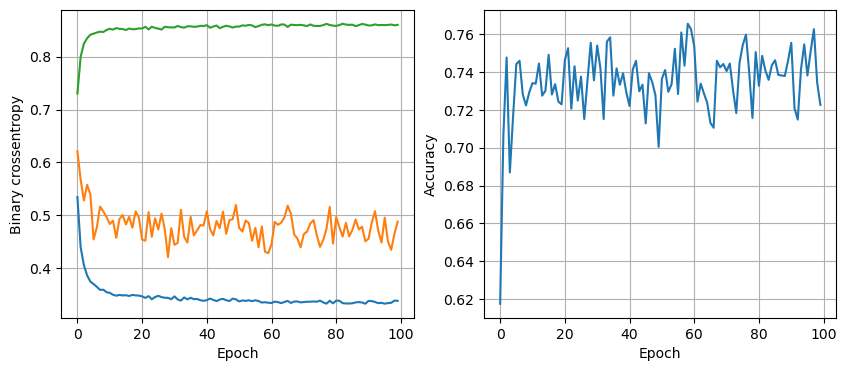

90/90 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8675
32 nodes, dropout 0, lr0.01, batch size 64


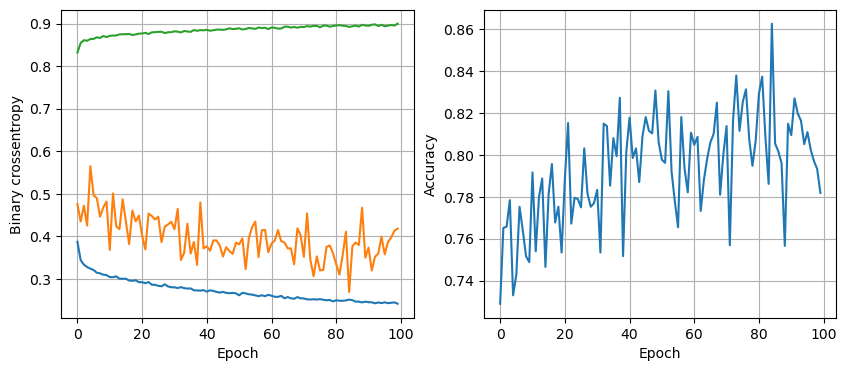

90/90 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8777
32 nodes, dropout 0, lr0.01, batch size 128


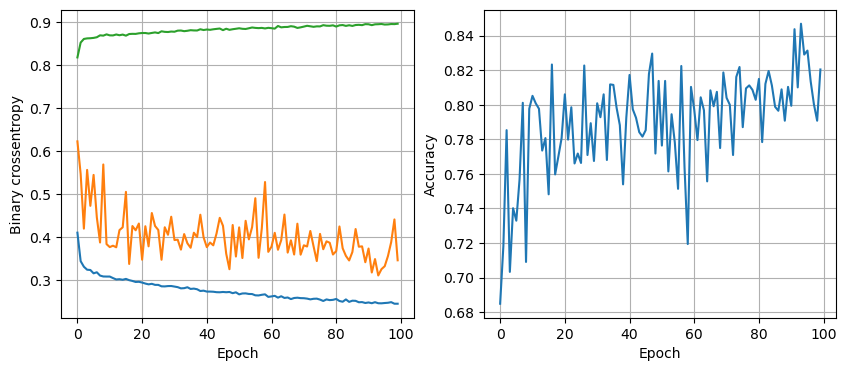

90/90 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8749
32 nodes, dropout 0, lr0.005, batch size 64


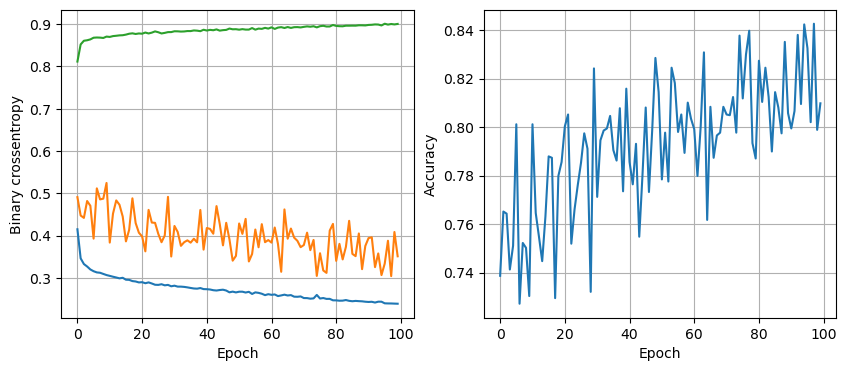

90/90 [==============================] - 0s 1ms/step - loss: 0.3138 - accuracy: 0.8794
32 nodes, dropout 0, lr0.005, batch size 128


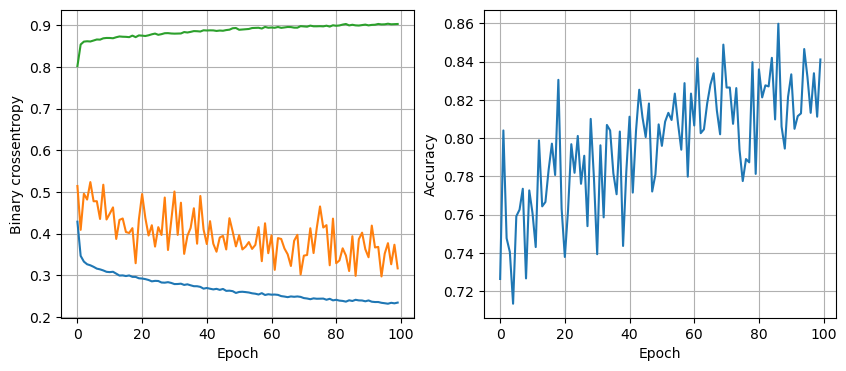

90/90 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8780
32 nodes, dropout 0.2, lr0.01, batch size 64


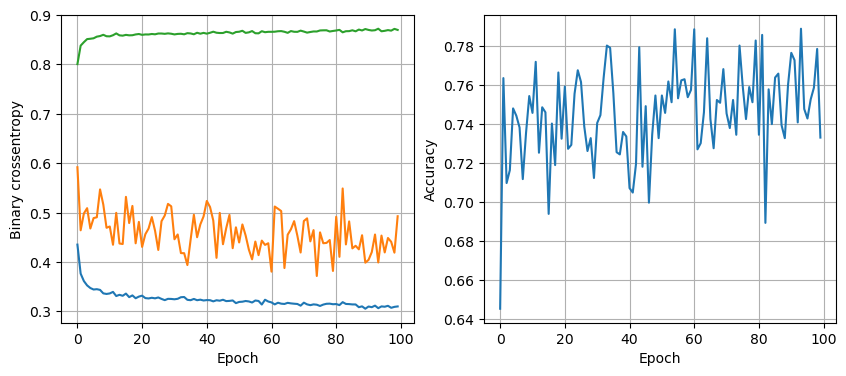

90/90 [==============================] - 0s 1ms/step - loss: 0.3008 - accuracy: 0.8728
32 nodes, dropout 0.2, lr0.01, batch size 128


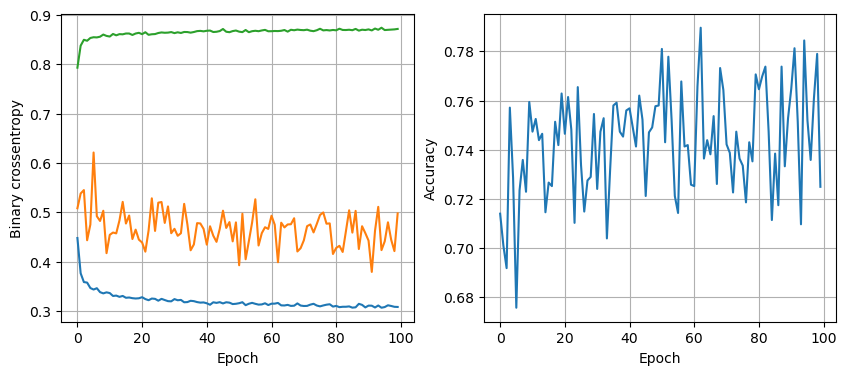

90/90 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.8724
32 nodes, dropout 0.2, lr0.005, batch size 64


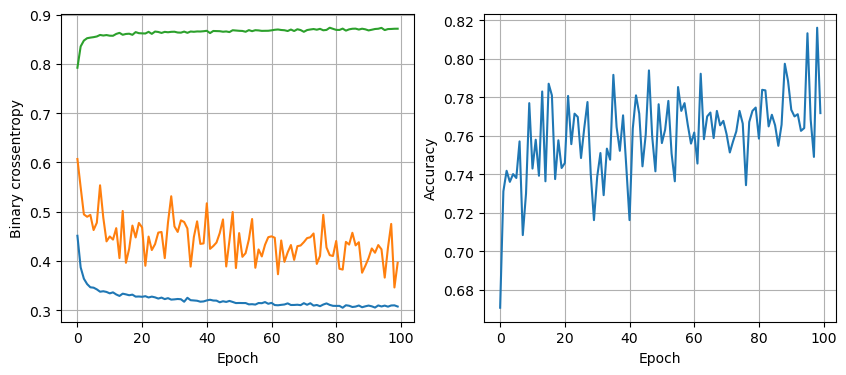

90/90 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.8724
32 nodes, dropout 0.2, lr0.005, batch size 128


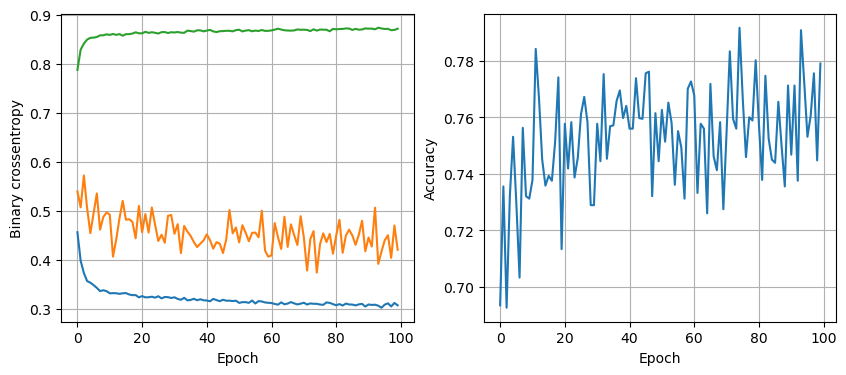

90/90 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8791
64 nodes, dropout 0, lr0.01, batch size 64


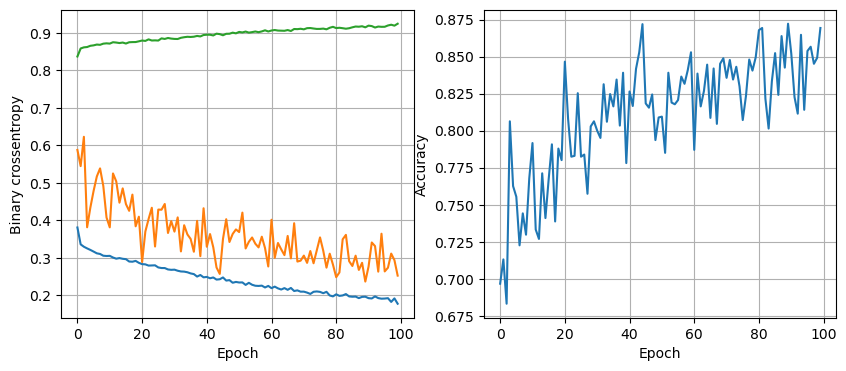

90/90 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8665
64 nodes, dropout 0, lr0.01, batch size 128


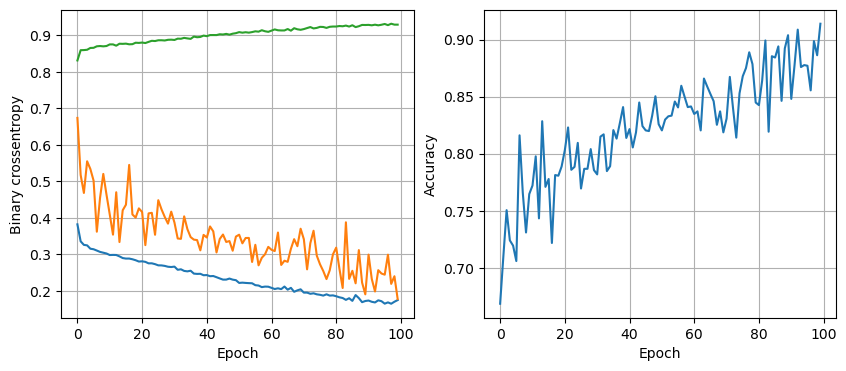

90/90 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.8542
64 nodes, dropout 0, lr0.005, batch size 64


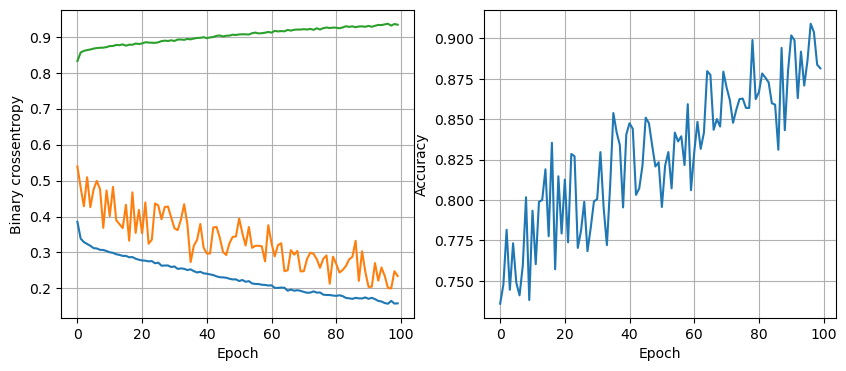

90/90 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8594
64 nodes, dropout 0, lr0.005, batch size 128


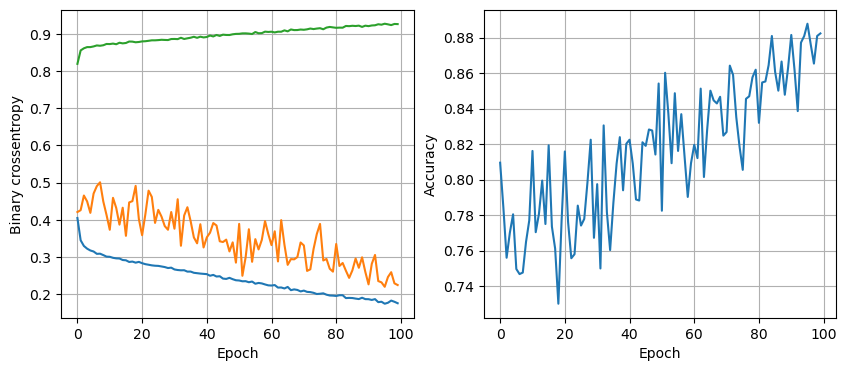

90/90 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8682
64 nodes, dropout 0.2, lr0.01, batch size 64


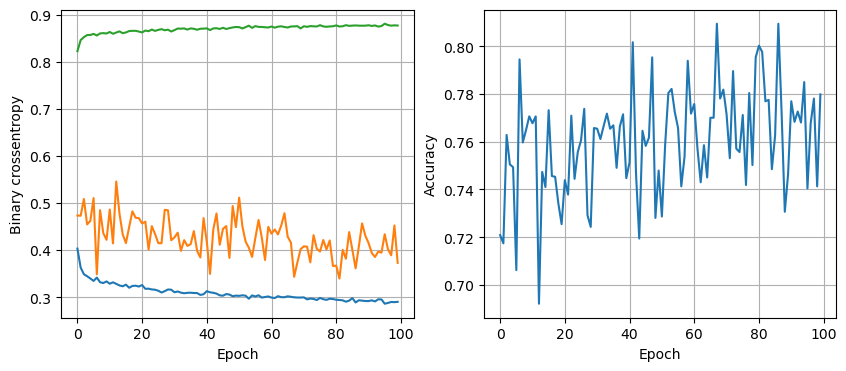

90/90 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8840
64 nodes, dropout 0.2, lr0.01, batch size 128


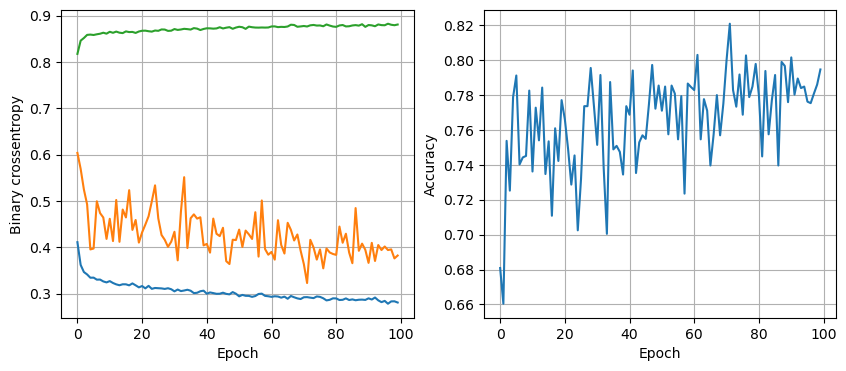

90/90 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8794
64 nodes, dropout 0.2, lr0.005, batch size 64


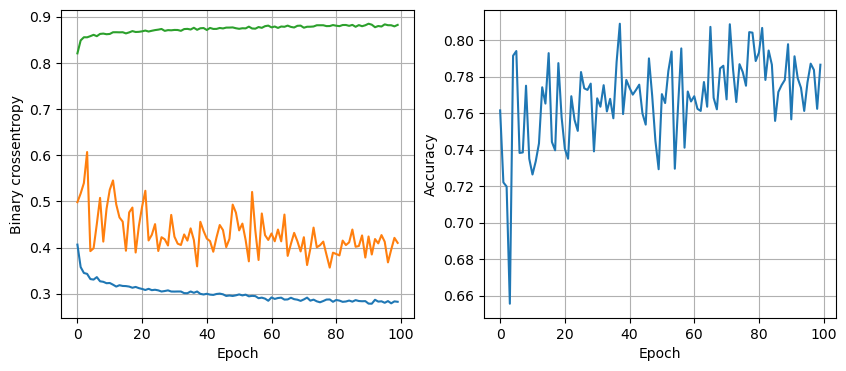

90/90 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8798
64 nodes, dropout 0.2, lr0.005, batch size 128


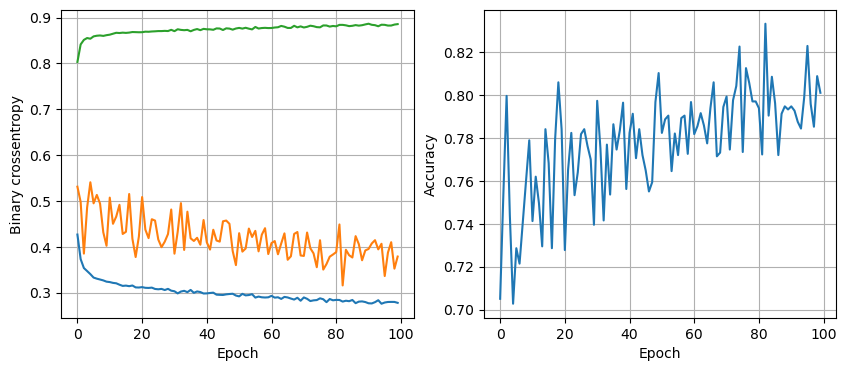

90/90 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.8801


In [25]:
# Training the many different models, running this cell is gonna take a while...
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01,0.005]:
            for batch_size in [64,128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr{lr}, batch size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [26]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)
print(classification_report(y_test,y_pred))

90/90 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1053
           1       0.86      0.95      0.90      1800

    accuracy                           0.87      2853
   macro avg       0.88      0.84      0.86      2853
weighted avg       0.87      0.87      0.87      2853



We got 0.87 as our accuracy for the NN, which is the same as SVMs. Therefore SVMs are better for this specific problem since they are much faster computationally